# Lens modeling with lenstronomy
Author: Sulyman Hossain (Robin), Anowar J. Shajib \
Acknowledgement:

In [1]:
# import of standard python libraries
import h5py
import joblib
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Util import mask_util, util
from lenstronomy.Workflow.fitting_sequence import FittingSequence

!pip install lenstronomy


%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.9 MB/s eta 0:00:00
  Created wheel for lenstronomy: filename=lenstronomy-1.11.2-py3-none-any.whl size=1086821 sha256=e39e96f01af55ba6db9c36696aec4459ff294350f3a548c8c185277bee836085
  Stored in directory: /root/.cache/pip/wheels/1c/62/fa/1c6f5bd9f9e9e37978c5ef811810e69118ea87f2a1cd0b946d
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15729 sha256=ef399ae5b3c561549f5ff3954f0b20b27db9fe4613cac1dc88324661d467a349
  Stored in directory: /root/.cache/pip/wheels/4a/ea/3e/b79646d96eaea548b8ee

### Extracting the observed image data from a .h5 file

In [2]:
with h5py.File("/content/DESIJ1205+4110_F140W.h5", "r") as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
# kwargs_data

### Extracting the information about Point Spread Function(PSF) from a .h5 file

In [3]:
with h5py.File("/content/psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
kwargs_psf["psf_type"] = "PIXEL"
# kwargs_psf

# Visualizing the image

<ipython-input-4-138fa47da36a>:2: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")


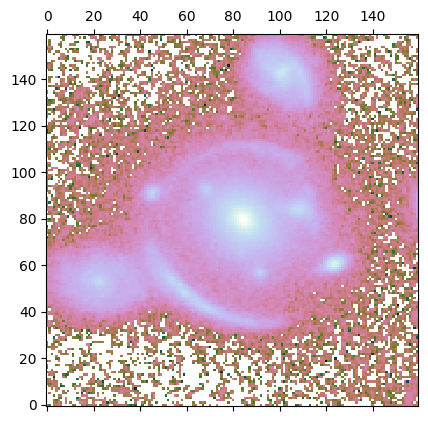

In [4]:
image_data = kwargs_data["image_data"]
plt.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
# plt.grid(which='both', color='black')
# plt.minorticks_on()
# plt.grid(which='minor', color='black')
plt.show()

# Masking

<ipython-input-5-cdb3b860a13b>:134: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(kwargs_data["image_data"]), origin="lower", cmap="cubehelix")
<ipython-input-5-cdb3b860a13b>:146: RuntimeWarning: divide by zero encountered in log10
  image = np.log10(kwargs_data["image_data"] * mask)
<ipython-input-5-cdb3b860a13b>:146: RuntimeWarning: invalid value encountered in log10
  image = np.log10(kwargs_data["image_data"] * mask)


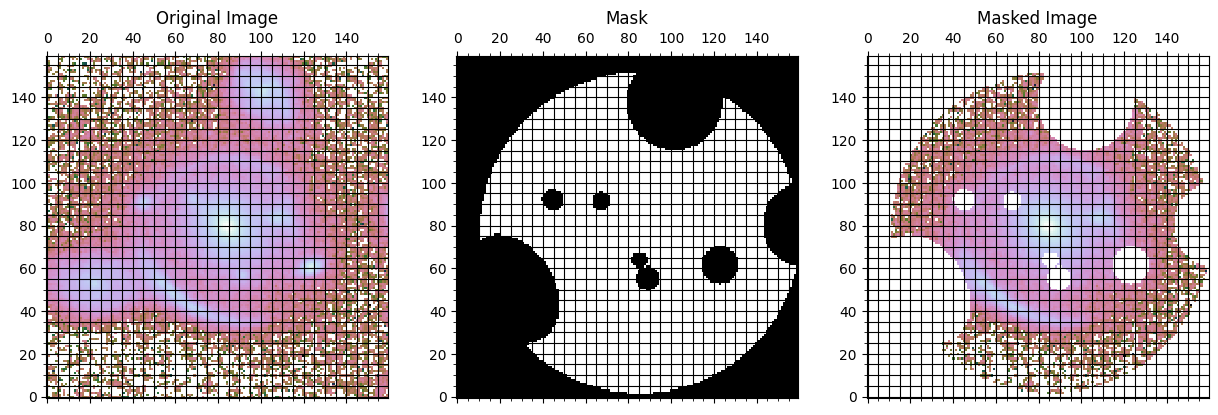

In [5]:
# To make a likelihood mask using lenstronomy functions,
# here is an example code:


ra_at_xy_0 = kwargs_data["ra_at_xy_0"]
dec_at_xy_0 = kwargs_data["dec_at_xy_0"]
transform_pix2angle = kwargs_data["transform_pix2angle"]

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data["image_data"])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

r = 6  # arcseconds
lens_center_ra = 0.4
lens_center_dec = -0.8

mask_outer = mask_util.mask_center_2d(
    lens_center_ra - 0.8,
    lens_center_dec + 0.5,
    r,
    util.image2array(x_coords),
    util.image2array(y_coords),
)

mask_ext_1_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 2.1,
    lens_center_dec + 5.4,
    1.8,
    1.8,
    0,
)

mask_ext_3_oclock_short = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 2.8,
    lens_center_dec + 1.1,
    0.65,
    0.65,
    0,
)

mask_ext_3_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 7,
    lens_center_dec + 0.8,
    1.6,
    1.6,
    0,
)

mask_ext_4_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 3.8,
    lens_center_dec - 0.7,
    0.7,
    0.7,
    0,
)

mask_ext_6_oclock_short = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 0.8,
    lens_center_dec - 0.5,
    0.3,
    0.3,
    0,
)

mask_ext_6_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra - 1.1,
    lens_center_dec - 1.2,
    0.45,
    0.45,
    0,
)

mask_ext_8_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra + 4,
    lens_center_dec - 1.6,
    2.2,
    1.6,
    1,
)

mask_ext_10_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra + 2.45,
    lens_center_dec + 1.75,
    0.4,
    0.4,
    0,
)
mask_ext_11_oclock = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    lens_center_ra + 0.65,
    lens_center_dec + 1.7,
    0.35,
    0.35,
    0,
)

mask = (
    (1 - mask_outer)
    * (1 - mask_ext_1_oclock)
    # * (1 - mask_ext_3_oclock_short)
    * (1 - mask_ext_3_oclock)
    * (1 - mask_ext_4_oclock)
    * (1 - mask_ext_6_oclock_short)
    * (1 - mask_ext_6_oclock)
    * (1 - mask_ext_8_oclock)
    * (1 - mask_ext_10_oclock)
    * (1 - mask_ext_11_oclock)
)

mask[mask >= 1] = 1
mask[mask < 0] = 0

mask = mask.reshape(num_pix, num_pix)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.matshow(np.log10(kwargs_data["image_data"]), origin="lower", cmap="cubehelix")
ax1.grid(which="both", color="black")
ax1.minorticks_on()
ax1.grid(which="minor", color="black")
ax1.title.set_text("Original Image")
ax2.matshow(mask, origin="lower", cmap="cubehelix")
ax2.grid(which="both", color="black")
ax2.minorticks_on()
ax2.grid(which="minor", color="black")
ax2.title.set_text("Mask")
ax2.title.set_text("Mask")

image = np.log10(kwargs_data["image_data"] * mask)

ax3.matshow(image, origin="lower", cmap="cubehelix")
ax3.grid(which="both", color="black")
ax3.minorticks_on()
ax3.grid(which="minor", color="black")
ax3.title.set_text("Masked Image")
plt.show()

## Building a lens model

Here, we build a lens model. The lens model can be thought of three
components: the lens galaxy's mass model, the lens galaxy's light model, and
the source galaxy's light model. We have to give a list of profiles for each
 component as shown in the next codecell.

The `'EPL'` lens mass profile stands for Elliptical Power Law. The form of
this convergence profile is given by:
$$\kappa(x, y) = \frac{3 - \gamma}{2} \left[ \frac{\theta_{\rm E}}{\sqrt{q
x^2 + y^2 / q}} \right]^{\gamma - 1}. $$

The position angle $\phi$ adjusts the orientation of the mass profile's
major axis. The ellipticity parameters $q$ and $\phi$ can be reformulated as
$$e_1 = \frac{1 - q}{1 + q} \cos 2\phi,$$
$$e_2 = \frac{1 - q}{1 + q} \sin 2\phi.$$

`lenstronomy` uses $e_1$ and $e_2$ instead of $q$ and $\phi$, because $e_1$
and $e_2$ are easier to handle in numerical optimization, for example, in
MCMC. You can check [here](https://github.com/lenstronomy/lenstronomy-tutorials/blob/main/Notebooks/GettingStarted/units_coordinates_parameters_definitions.ipynb) for more details on
parameter definitions and conventions used in `lenstronomy`.


Both the lens galaxy's and the source galaxy's light profiles are modeled
with Sersic function, which is given by:

$$I(x, y) = I_{\rm e} \exp \left[ -b_{n} \left\{ \left( \frac{\sqrt{q x^2
+ y^2/q}}{R_{\rm Sersic}} \right)^{1/n_{\rm Sersic}} - 1 \right\}
\right].$$

In [6]:
lens_model_list = [
    "EPL",
    "SHEAR",
    "SIE",
]
source_model_list = [
    "SERSIC_ELLIPSE",
    "SHAPELETS",
    #                    "SHAPELETS",
]
lens_light_model_list = [
    "SERSIC_ELLIPSE",
    "SERSIC_ELLIPSE",
    "SERSIC_ELLIPSE",
]

In this cell below, we have to specify the initial values, upper and lower
limits for the model parameters specific to each of the model components
specified in the above lists. The `kwargs_*_sigma` dictionaries/lists are
used to set the initial size of the search area within particle swarm
optimization (PSO) or MCMC.

### Mass model of the lens galaxy

In [7]:
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

# EPL Profile

fixed_lens.append({"gamma": 2.0})
kwargs_lens_init.append(
    {
        "theta_E": 3.0,
        "gamma": 2.0,
        "e1": -0.0274,
        "e2": 0.265,
        "center_x": -0.3288,
        "center_y": -0.207,
    }
)
kwargs_lens_sigma.append(
    {
        "theta_E": 0.5,
        "gamma": 0.5,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
    }
)
kwargs_lower_lens.append(
    {
        "theta_E": 2.0,
        "gamma": 1.0,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)
kwargs_upper_lens.append(
    {"theta_E": 10, "gamma": 3, "e1": 0.5, "e2": 0.5, "center_x": 10, "center_y": 10}
)

# SHEAR Profile

fixed_lens.append({})
kwargs_lens_init.append(
    {
        "gamma1": -0.071,
        "gamma2": 0.153,
        "ra_0": 0.1153,
        "dec_0": -2.17,
    }
)
kwargs_lens_sigma.append({"gamma1": 0.05, "gamma2": 0.05, "ra_0": 0.2, "dec_0": 0.2})
kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3, "ra_0": -10, "dec_0": -10})
kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3, "ra_0": 10, "dec_0": 10})

"""# SHEAR GAMMA PSI
fixed_lens.append(
    {
        "ra_0": 0,
        "dec_0": 0,
    }
)
kwargs_lens_init.append(
    {"gamma_ext": 0.12, "psi_ext": 0.563, "ra_0": 0, "dec_0": 0}
)
kwargs_lens_sigma.append(
    {"gamma_ext": 0.3, "psi_ext": 0.5, "ra_0": 0.1, "dec_0": 0.1}
)
kwargs_lower_lens.append(
    {"gamma_ext": 0, "psi_ext": -np.pi / 2, "ra_0": -100, "dec_0": -100}
)
kwargs_upper_lens.append(
    {"gamma_ext": 0.4, "psi_ext": np.pi / 2, "ra_0": 100, "dec_0": 100}
)"""

# Satellite Galaxy Mass Profile: SIE

satellite_center_x = -2.8
satellite_center_y = +1.1
satellite_centroid_bound = 1

fixed_lens.append({})
kwargs_lens_init.append(
    {
        "theta_E": 0.211496,
        "e1": 0.0244,
        "e2": -0.035,
        "center_x": satellite_center_x,
        "center_y": satellite_center_y,
    }
)
kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": satellite_center_x / 4,
        "center_y": satellite_center_y / 4,
    }
)
kwargs_lower_lens.append(
    {
        "theta_E": 0.0001,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": satellite_center_x - satellite_centroid_bound,
        "center_y": satellite_center_y - satellite_centroid_bound,
    }
)
kwargs_upper_lens.append(
    {
        "theta_E": 2.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": satellite_center_x + satellite_centroid_bound,
        "center_y": satellite_center_y + satellite_centroid_bound,
    }
)


lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]

### Light model of the lens galaxy

In [8]:
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []


# 1st SERSIC_ELLIPSE Profile

fixed_lens_light.append({"n_sersic": 1.0})
kwargs_lens_light_init.append(
    {
        "amp": 1,
        "R_sersic": 0.5,
        "n_sersic": 1.0,
        "e1": 0.0369,
        "e2": 0.0935,
        "center_x": -0.3275,
        "center_y": -0.064,
    }
)
kwargs_lens_light_sigma.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 0.5,
        "e1": 0.1,
        "e2": 0.1,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)
kwargs_lower_lens_light.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 0.5,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_lens_light.append(
    {
        "R_sersic": 5.0,
        "n_sersic": 5.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)


# 2nd SERSIC_ELLIPSE Profile

fixed_lens_light.append({"n_sersic": 4.0})
kwargs_lens_light_init.append(
    {
        "amp": 1,
        "R_sersic": 2,
        "n_sersic": 4.0,
        "e1": 0.0476,
        "e2": 0.0790,
        "center_x": -0.327,
        "center_y": -0.06,
    }
)
kwargs_lens_light_sigma.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 0.5,
        "e1": 0.1,
        "e2": 0.1,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)
kwargs_lower_lens_light.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 0.5,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_lens_light.append(
    {
        "R_sersic": 5.0,
        "n_sersic": 5.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)


# 3rd Sersic Ellipse for Satellite Galaxy

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_init.append(
    {
        "R_sersic": 1.032,
        "n_sersic": 2,
        "e1": 0.02444,
        "e2": -0.035,
        "center_x": satellite_center_x,
        "center_y": satellite_center_y,
        "amp": 1,
    }
)
kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": satellite_centroid_bound / 4,
        "center_y": satellite_centroid_bound / 4,
        "amp": 1,
    }
)
kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": satellite_center_x - satellite_centroid_bound,
        "center_y": satellite_center_y - satellite_centroid_bound,
        "amp": 0,
    }
)
kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 5,
        "n_sersic": 5.0,
        "center_x": satellite_center_x + satellite_centroid_bound,
        "center_y": satellite_center_y + satellite_centroid_bound,
        "amp": 100,
    }
)
joint_lens_with_lens_light = [
    [2, 2, ["center_x", "center_y", "e1", "e2"]],
    #     [0, 0, ["center_x", "center_y", "e1", "e2"]]
]
joint_lens_light_with_lens_light = [[0, 1, ["center_x", "center_y"]]]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]

### Light model of the source galaxy

In [9]:
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []


# SERSIC_ELLIPSE profile

fixed_source.append({"n_sersic": 1.0})
kwargs_source_init.append(
    {
        "amp": 1,
        "R_sersic": 0.15,
        "n_sersic": 1.0,
        "e1": 0.3245,
        "e2": -0.105,
        "center_x": -0.223,
        "center_y": -0.573,
    }
)
kwargs_source_sigma.append(
    {
        "R_sersic": 0.2,
        "n_sersic": 0.5,
        "e1": 0.1,
        "e2": 0.1,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)
kwargs_lower_source.append(
    {
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)
kwargs_upper_source.append(
    {
        "R_sersic": 0.5,
        "n_sersic": 5.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

# SHAPELETS profile

fixed_source.append({"n_max": 10})
kwargs_source_init.append(
    {
        "amp": 1,
        "n_max": 10,
        "beta": 0.02187,
        "center_x": -0.223,
        "center_y": -0.57,
    }
)
kwargs_source_sigma.append({"beta": 0.05, "center_x": 0.2, "center_y": 0.2})
kwargs_lower_source.append({"beta": 0.001, "center_x": -10, "center_y": -10})
kwargs_upper_source.append({"beta": 0.1, "center_x": 10, "center_y": 10})

joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]

"""
# 2nd Shapelets

fixed_source.append({"n_max": 10})
kwargs_source_init.append(
    {
        "amp": 1,
        "n_max": 8,
        "beta": 0.02187,
        "center_x": 0.,
        "center_y": 0.,
    }
)
kwargs_source_sigma.append({"beta": 0.1, "center_x": 0.2, "center_y": 0.2})
kwargs_lower_source.append({"beta": 0.001, "center_x": -10, "center_y": -10})
kwargs_upper_source.append({"beta": 0.1, "center_x": 10, "center_y": 10})"""


source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

In [10]:
# Combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {
    "joint_lens_light_with_lens_light": joint_lens_light_with_lens_light,
    "joint_lens_with_light": joint_lens_with_lens_light,
    "joint_source_with_source": joint_source_with_source,
}

#### Numerical settings

In [11]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 1, "supersampling_convolution": False}

#### Combining all the information to be sent to lenstronomy

In [12]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band",
}

## Here the model fiting is done

In [13]:
fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
)

fitting_kwargs_list = [
    ["PSO", {"sigma_scale": 1.0, "n_particles": 50, "n_iterations": 50}]
]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.6755790082472737 reduced X^2 of best position
-11748.32221632576 log likelihood
14023 effective number of data points
[{'theta_E': 2.735261299543524, 'gamma': 2.0, 'e1': 0.07679252450453758, 'e2': 0.24799905229989774, 'center_x': -0.3224418731720494, 'center_y': -0.26835748332921505}, {'gamma1': -0.028122639307528757, 'gamma2': 0.15009363468946552, 'ra_0': 0.048640514423796105, 'dec_0': -2.4323226119384707}, {'theta_E': 0.15385875068373855, 'e1': -0.05881997956331238, 'e2': -0.19790648160886457, 'center_x': -2.011187134216028, 'center_y': 0.4317690375869853}] lens result
[{'amp': 1, 'R_sersic': 0.2659000156277334, 'n_sersic': 1.0, 'e1': 0.408195164972537, 'e2': -0.1537934790315209, 'center_x': -0.24746488411094994, 'center_y': -0.5687154590427376}, {'amp': 1, 'n_max': 10, 'beta': 0.0934172786398715, 'center_x': -0.24746488411094994, 'center_y': -0.5687154590427376}] source result
[{'amp': 1, 'R_sersic': 1.08318985

## Visualizing the fitted model

-1.663832627372736 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.6638326273727355


/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


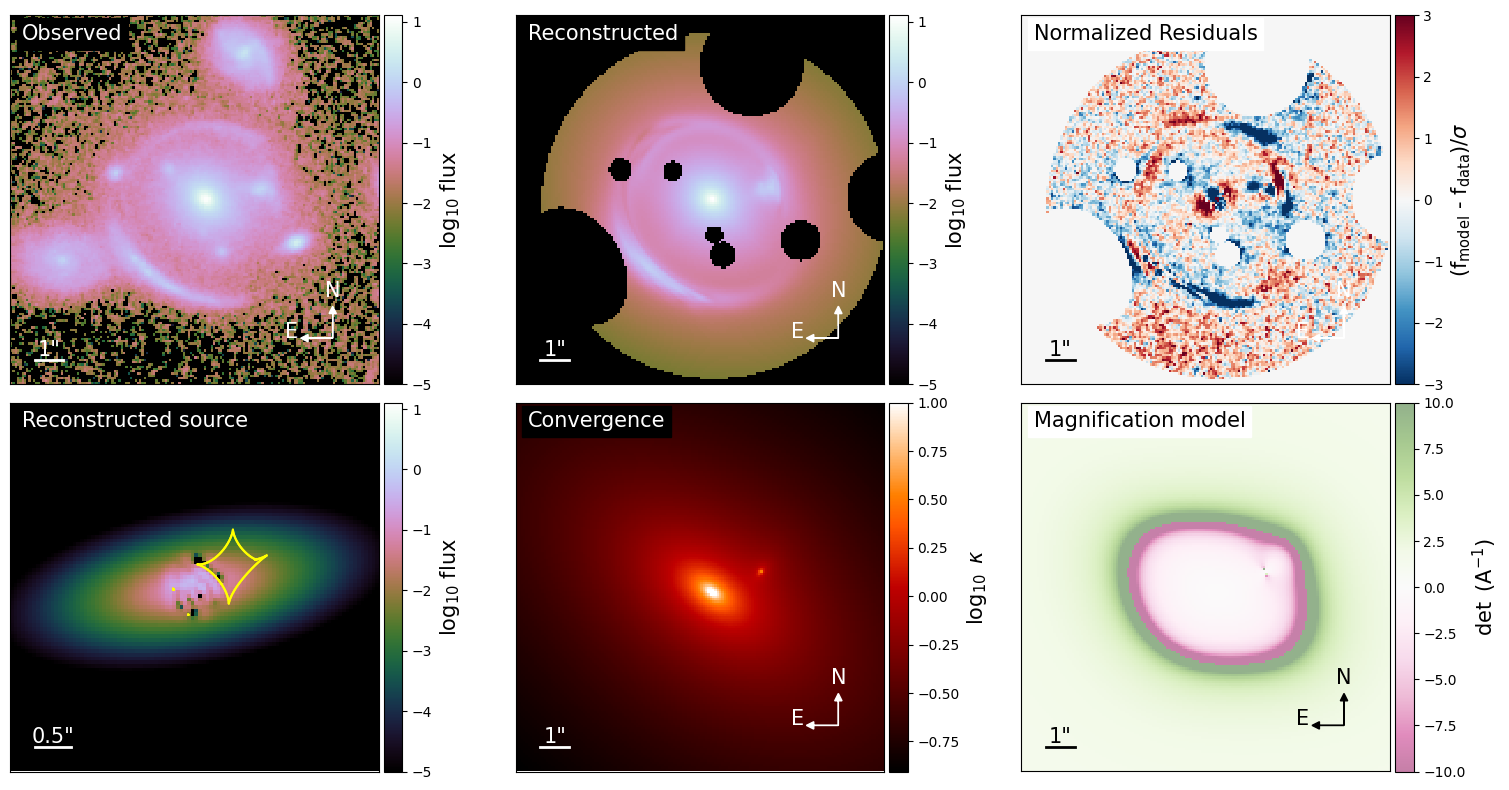

/usr/local/lib/python3.10/dist-packages/lenstronomy/Plots/model_band_plot.py:511: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


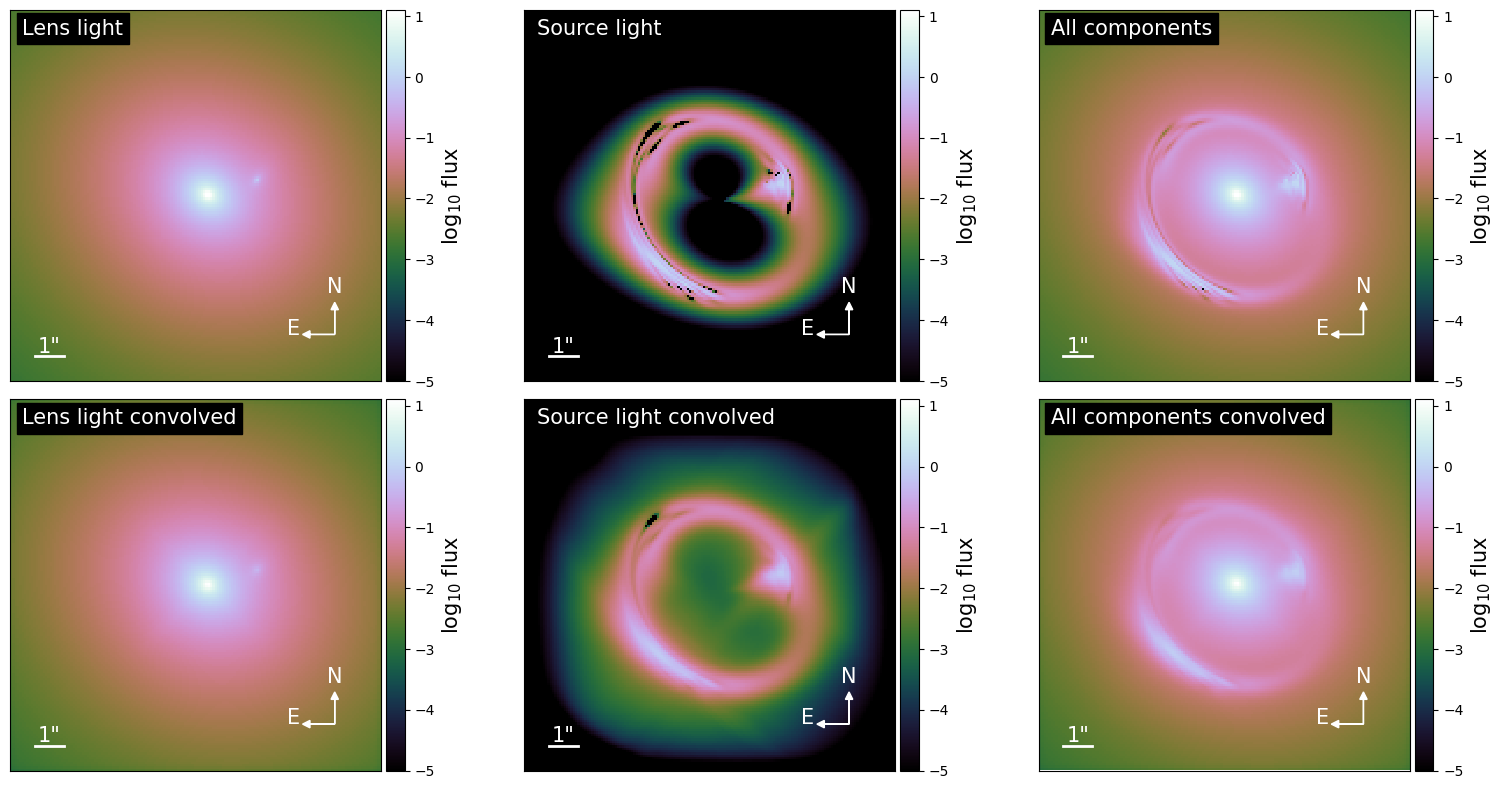

{'kwargs_lens': [{'theta_E': 2.735261299543524, 'gamma': 2.0, 'e1': 0.07679252450453758, 'e2': 0.24799905229989774, 'center_x': -0.3224418731720494, 'center_y': -0.26835748332921505}, {'gamma1': -0.028122639307528757, 'gamma2': 0.15009363468946552, 'ra_0': 0.048640514423796105, 'dec_0': -2.4323226119384707}, {'theta_E': 0.15385875068373855, 'e1': -0.05881997956331238, 'e2': -0.19790648160886457, 'center_x': -2.011187134216028, 'center_y': 0.4317690375869853}], 'kwargs_source': [{'amp': 31.21813178549501, 'R_sersic': 0.2659000156277334, 'n_sersic': 1.0, 'e1': 0.408195164972537, 'e2': -0.1537934790315209, 'center_x': -0.24746488411094994, 'center_y': -0.5687154590427376}, {'amp': array([ 56.23719855,  30.44451574, 116.43610742,  49.28131045,
        30.80329366,  48.36310899,  12.18888663,  44.93340511,
       -17.87315672,  15.10893724,  14.84801241,   7.16752558,
        -4.85183032, -53.88774962,  -5.33931386,  22.38951743,
        17.18357766, -15.88913212,   6.94343702, -28.3223314 

In [14]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.05, with_caustics=True, scale_size=0.5, numPix=100
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result)

In [15]:
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = None  # can be not `None` for MCMC

input = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]
output = [kwargs_result, multi_band_list_out, chain_list, kwargs_fixed_out]

output_path = "DESIJ1225-0725_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

output_path = "DESIJ1225-0725_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

In [16]:
# joblib.load('DESIJ1225-0725_pso_output.joblib')